# Gradient Descent

**F21BC Coursework 1**

<sub>Name: **Heba El-Shimy**</sub>
<br>
<sub>Based on code obtained from coursework specfication report, written by **Dr. Marta Vallejo**</sub>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from math import sqrt

/Users/Heba/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.set_printoptions(precision=2)

In [3]:
# Loading the dataset
os.getcwd()
train_dataset = h5py.File('trainCats.h5', "r")
trainSetX = np.array(train_dataset["train_set_x"][:]) # your train set features
trainSetY = np.array(train_dataset["train_set_y"][:]) # your train set labels
trainSetY = trainSetY.reshape((1, trainSetY.shape[0]))

test_dataset = h5py.File('testCats.h5', "r")
testSetX = np.array(test_dataset["test_set_x"][:]) # your test set features
testSetY = np.array(test_dataset["test_set_y"][:]) # your test set labels
testSetY = testSetY.reshape((1, testSetY.shape[0]))

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

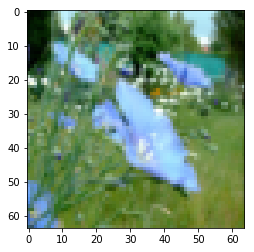

y = [0], it's a 'non-cat' picture.


In [4]:
# Example of a picture
index = 20
plt.imshow(trainSetX[index])
plt.show()
print ("y = " + str(trainSetY[:, index]) + ", it's a '" + classes[np.squeeze(trainSetY[:, index])].decode("utf-8") +  "' picture.")

In [5]:
# Images dimensions
print(trainSetX.shape)
print(testSetX.shape)

print('Image dimensions: {}px x {}px '.format(trainSetX.shape[1], trainSetX.shape[2]))
print('Image channels: {}'.format(trainSetX.shape[-1]))
print('Number of training examples: {} images'.format(trainSetX.shape[0]))
print('Number of test examples: {} images'.format(testSetX.shape[0]))

(209, 64, 64, 3)
(50, 64, 64, 3)
Image dimensions: 64px x 64px 
Image channels: 3
Number of training examples: 209 images
Number of test examples: 50 images


In [6]:
# Flatten the pictures
# Applying (num_pixel x num_pixel x num_channels)
trainSetXF= trainSetX.reshape(trainSetX.shape[0], -1).T
testSetXF = testSetX.reshape(testSetX.shape[0], -1).T

print('Shape of training data after flattening: {}'.format(trainSetXF.shape))
print('Shape of test data after flattening: {}'.format(testSetXF.shape))

Shape of training data after flattening: (12288, 209)
Shape of test data after flattening: (12288, 50)


In [7]:
# Normalize images
# Applying (pixel_value/255)
trainSetXFN = trainSetXF / 255
testSetXFN = testSetXF / 255

print('Shape of training data after normalizing: {}'.format(trainSetXFN.shape))
print('Shape of test data after normalizing: {}'.format(testSetXFN.shape))

print('First row of training data before normalizing: \n{}\n'.format(trainSetXF[0]))
print('First row of training data after normalizing: \n{}\n'.format(trainSetXFN[0]))

print('First row of test data before normalizing: \n{}\n'.format(testSetXF[0]))
print('First row of test data after normalizing: \n{}\n'.format(testSetXFN[0]))

Shape of training data after normalizing: (12288, 209)
Shape of test data after normalizing: (12288, 50)
First row of training data before normalizing: 
[ 17 196  82   1   9  84  56  19  63  23 188   4 154  17  72 245 253 217
 140   2   5  17 164 156 122  15  78  36  14 180  39 190 233 129 137  26
  23  94  63 113 119   1  63 255  61   0  64  51  21  57 164 152 106  40
  15 255  31 141  52  75  81 125  99  94   2  86 226  76 139  43  24   7
  13 103  85 110  25  61  34  27 176 187  26 252  96  25  34  60 123  45
  99  49  26 154 141  62 152 194 113  57 172  70  22 142  37 127 172 122
 110  75 165 174   5 166 144 196   2  64 190 170  86 106 198  70 171   9
  50  84 161  23  79 228 104   1   5 255 142 196 135  89   0 188 255  17
  31 169 136  79 130 150 251   7  45 159  10 135  32  30 140  29  29 110
  99 242 158  30 240  84  10  93 200 190 133  74  25   3 106 133  12 105
 239   1  62  67  29 178  68  55 201 195 144 251 130  67  10   0  93 101
 151  29 255  43 102  93 200   9 143  22   8

In [8]:
# Network Topology
print('Number of input units: {}'.format(trainSetXFN.shape[0]))
print('Number of outputs: {}'.format(classes.shape[0]))

Number of input units: 12288
Number of outputs: 2


In [336]:
# Initialize weights
W = np.random.uniform(low=-0.5, high=0.5, size=(trainSetXFN.shape[0], 1)) / sqrt(trainSetXFN.shape[1])

print('Shape of weights matrix: {}'.format(W.shape))
print('Range of values in weights matrix = [{} - {}]'.format(W.min(), W.max()))
print('First (only) column in weights matrix: \n{}'.format(W))

Shape of weights matrix: (12288, 1)
Range of values in weights matrix = [-0.03457753426027212 - 0.03458404760391618]
First (only) column in weights matrix: 
[[-0.02]
 [ 0.  ]
 [ 0.  ]
 ...
 [-0.02]
 [-0.01]
 [-0.03]]


In [26]:
# Initialize biases
b = np.zeros([1, ])

#print('Shape of bias vector: {}'.format(b.shape))
print('First value in bias vector: \n{}'.format(b))

First value in bias vector: 
[0.]


In [21]:
# Activation function
# Sigmoid

def sigmoid(z):
    """
    Compute sigmoid function
    @param z: value to compute sigmoid for (WX + b)
    """
    
    a = np.zeros([1, 1])
    a = 1 / (1 + np.exp(-z))

    return a

In [22]:
# Cost calculation
# Cross-Entropy as the loss function

def cost(a, y):
    """
    Compute loss function
    @param a: predicted label
    @param y: actual label
    """
    
    L = np.sum((y * np.log(a)) + ((1 - y) * np.log(1 - a)))
    
    J = (-1 / y.shape[1]) * L
    
    return J

In [338]:
# Training the neuron

W_mod = np.copy(W) # modified weights matrix
b_mod = np.copy(b) # modidied bias vector
lr = 0.1 # learning rate
epochs = 1000 # number of iterations
costs = [] # store all calculated costs

# Training iterations
for i in range(epochs):  
    J = 0
    dW = np.zeros(W_mod.shape)   
    db = b_mod
    
    z = np.dot(W_mod.T, trainSetXFN) + b_mod
    predicted_labels = sigmoid(z)
    
    J = cost(predicted_labels, trainSetY)
    dW = (1 / trainSetY.shape[1]) * np.dot(trainSetXFN, (predicted_labels - trainSetY).T)
    db = (1 / trainSetY.shape[1]) * np.sum((predicted_labels - trainSetY), axis=1)
    
    costs.append(J)
    # learning rate decay
    if i > 0:
        if i % 100 == 0: #and abs(costs[i-50] - J) <= 0.5:
            lr /= 2
    
    W_mod = W_mod - (lr * dW)
    b_mod = b_mod - (lr * db)
    print('Learning rate: {}'.format(lr))
    print('Iteration {}\t =======> \t Cost: {:.2f}\n'.format(i, J))

Learning rate: 0.1
Iteration 0	 =======> 	 Cost: 0.82

Learning rate: 0.1
Iteration 1	 =======> 	 Cost: 18.81

Learning rate: 0.1
Iteration 2	 =======> 	 Cost: 11.67

Learning rate: 0.1
Iteration 3	 =======> 	 Cost: 39.82

Learning rate: 0.1
Iteration 4	 =======> 	 Cost: 14.41

Learning rate: 0.1
Iteration 5	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 6	 =======> 	 Cost: 35.43

Learning rate: 0.1
Iteration 7	 =======> 	 Cost: 10.02

Learning rate: 0.1
Iteration 8	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 9	 =======> 	 Cost: 31.05

Learning rate: 0.1
Iteration 10	 =======> 	 Cost: 5.65

Learning rate: 0.1
Iteration 11	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 12	 =======> 	 Cost: 26.70

Learning rate: 0.1
Iteration 13	 =======> 	 Cost: 1.53

Learning rate: 0.1
Iteration 14	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 15	 =======> 	 Cost: 28.97

Learning rate: 0.1
Iteration 16	 =======> 	 Cost: 3.58

Learning rate: 0.1
Iteration 17	 =======> 	 Cost: nan

/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


Learning rate: 0.1
Iteration 90	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 91	 =======> 	 Cost: 26.05

Learning rate: 0.1
Iteration 92	 =======> 	 Cost: 1.89

Learning rate: 0.1
Iteration 93	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 94	 =======> 	 Cost: 26.19

Learning rate: 0.1
Iteration 95	 =======> 	 Cost: 1.95

Learning rate: 0.1
Iteration 96	 =======> 	 Cost: nan

Learning rate: 0.1
Iteration 97	 =======> 	 Cost: 26.27

Learning rate: 0.1
Iteration 98	 =======> 	 Cost: 1.99

Learning rate: 0.1
Iteration 99	 =======> 	 Cost: nan

Learning rate: 0.05
Iteration 100	 =======> 	 Cost: 26.23

Learning rate: 0.05
Iteration 101	 =======> 	 Cost: 13.53

Learning rate: 0.05
Iteration 102	 =======> 	 Cost: 2.01

Learning rate: 0.05
Iteration 103	 =======> 	 Cost: nan

Learning rate: 0.05
Iteration 104	 =======> 	 Cost: 5.54

Learning rate: 0.05
Iteration 105	 =======> 	 Cost: nan

Learning rate: 0.05
Iteration 106	 =======> 	 Cost: 5.35

Learning rate: 0.05
Iteration 107	 

Learning rate: 0.025
Iteration 262	 =======> 	 Cost: 0.41

Learning rate: 0.025
Iteration 263	 =======> 	 Cost: 0.41

Learning rate: 0.025
Iteration 264	 =======> 	 Cost: 0.40

Learning rate: 0.025
Iteration 265	 =======> 	 Cost: 0.40

Learning rate: 0.025
Iteration 266	 =======> 	 Cost: 0.40

Learning rate: 0.025
Iteration 267	 =======> 	 Cost: 0.39

Learning rate: 0.025
Iteration 268	 =======> 	 Cost: 0.39

Learning rate: 0.025
Iteration 269	 =======> 	 Cost: 0.39

Learning rate: 0.025
Iteration 270	 =======> 	 Cost: 0.38

Learning rate: 0.025
Iteration 271	 =======> 	 Cost: 0.38

Learning rate: 0.025
Iteration 272	 =======> 	 Cost: 0.38

Learning rate: 0.025
Iteration 273	 =======> 	 Cost: 0.37

Learning rate: 0.025
Iteration 274	 =======> 	 Cost: 0.37

Learning rate: 0.025
Iteration 275	 =======> 	 Cost: 0.37

Learning rate: 0.025
Iteration 276	 =======> 	 Cost: 0.36

Learning rate: 0.025
Iteration 277	 =======> 	 Cost: 0.36

Learning rate: 0.025
Iteration 278	 =======> 	 Cost: 0.3

Learning rate: 0.00625
Iteration 434	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 435	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 436	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 437	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 438	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 439	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 440	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 441	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 442	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 443	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 444	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 445	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 446	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 447	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 448	 =======> 	 Cost: 0.19

Learning rate: 0.00625
Iteration 449	 =======> 	 Cost: 0.19

Learning rate: 0.00625
I

Learning rate: 0.0015625
Iteration 601	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 602	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 603	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 604	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 605	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 606	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 607	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 608	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 609	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 610	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 611	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 612	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 613	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 614	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 615	 =======> 	 Cost: 0.15

Learning rate: 0.0015625
Iteration 616	 =======> 	 Cost

Learning rate: 0.00078125
Iteration 773	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 774	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 775	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 776	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 777	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 778	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 779	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 780	 =======> 	 Cost: 0.15

Learning rate: 0.00078125
Iteration 781	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 782	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 783	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 784	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 785	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 786	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 787	 =======> 	 Cost: 0.14

Learning rate: 0.00078125
Iteration 788	

Learning rate: 0.0001953125
Iteration 936	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 937	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 938	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 939	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 940	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 941	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 942	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 943	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 944	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 945	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 946	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 947	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 948	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 949	 =======> 	 Cost: 0.14

Learning rate: 0.0001953125
Iteration 950	 =======> 	 Cost: 0.14

Learning r

In [339]:
# Test the model on the test set
test_pred = sigmoid(np.dot(W_mod.T, testSetXFN) + b_mod)

# Measure model accuracy
count = 0
for pred, label in zip(test_pred.ravel(), testSetY.ravel()):
    if round(pred) == label:
        count += 1

accuracy = float(count) / testSetY.shape[1] * 100
print('Model\'s accuracy = {:.2f}%'.format(accuracy))

Model's accuracy = 78.00%


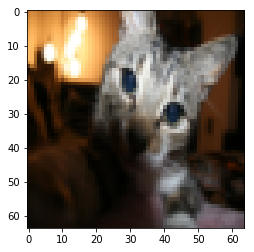

y = [1], predicted class= 1.0, it's a 'cat' picture.


In [343]:
# Example of a picture
index = int(np.random.randint(low=0, high=49))
plt.imshow(testSetX[index])
plt.show()

class_name = [0, 0]

if round(test_pred.ravel()[index]) == 0:
    class_name[0] = 'non-cat'
elif round(test_pred.ravel()[index]) == 1:
    class_name[1] = 'cat'

print ("y = " + str(testSetY[:, index]) + 
       ", predicted class= " + str(round(test_pred.ravel()[index])) +
       ", it's a '" + class_name[int(round(test_pred.ravel()[index]))] +  "' picture.")

In [405]:
import glob
import cv2
import os
import matplotlib.image as mpimg

# Experimenting on collected images

img_dir = "./images" 
img_files = glob.glob(os.path.join(img_dir,'*.jpg'))
imgs = []

for img in img_files:
    imgs.append(img)

(12288,)
y = [0], predicted class= 0.0, it's a 'non-cat' picture.


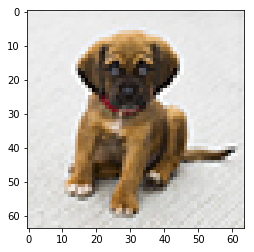

In [406]:
image_1 = plt.imread(imgs[0])
plt.imshow(image_1)

# Flatten and normalize image
image_1FN = image_1.reshape(-1).T / 255
print(image_1FN.shape)

# Use optimized weights for predicting the ouput
test_1 = sigmoid(np.dot(W_mod.T, image_1FN) + b_mod)

class_test_1 = [0, 0]

if round(test_1[0]) == 0:
    class_test_1[0] = 'non-cat'
elif round(test_1[0]) == 1:
    class_test_1[1] = 'cat'

print ("y = [0]"  + 
       ", predicted class= " + str(round(test_1[0])) +
       ", it's a '" + class_test_1[int(round(test_1[0]))] +  "' picture.")

(12288,)
y = [0], predicted class= 1.0, it's a 'cat' picture.


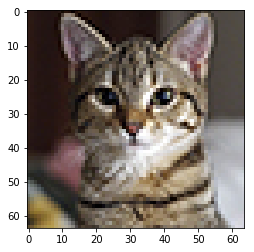

In [407]:
image_2 = plt.imread(imgs[1])
plt.imshow(image_2)

# Flatten and normalize image
image_2FN = image_2.reshape(-1).T / 255
print(image_2FN.shape)

# Use optimized weights for predicting the ouput
test_2 = sigmoid(np.dot(W_mod.T, image_2FN) + b_mod)

class_test_2 = [0, 0]

if round(test_2[0]) == 0:
    class_test_2[0] = 'non-cat'
elif round(test_2[0]) == 1:
    class_test_2[1] = 'cat'

print ("y = [0]"  + 
       ", predicted class= " + str(round(test_2[0])) +
       ", it's a '" + class_test_2[int(round(test_2[0]))] +  "' picture.")

(12288,)
y = [0], predicted class= 0.0, it's a 'non-cat' picture.


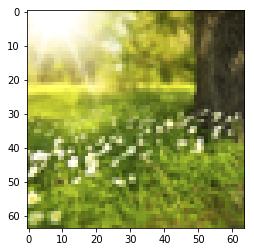

In [408]:
image_3 = plt.imread(imgs[2])
plt.imshow(image_3)

# Flatten and normalize image
image_3FN = image_3.reshape(-1).T / 255
print(image_3FN.shape)

# Use optimized weights for predicting the ouput
test_3 = sigmoid(np.dot(W_mod.T, image_3FN) + b_mod)

class_test_3 = [0, 0]

if round(test_3[0]) == 0:
    class_test_3[0] = 'non-cat'
elif round(test_3[0]) == 1:
    class_test_3[1] = 'cat'

print ("y = [0]"  + 
       ", predicted class= " + str(round(test_3[0])) +
       ", it's a '" + class_test_3[int(round(test_3[0]))] +  "' picture.")